In [68]:
!pip install geojson geopandas geoplot

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [70]:
data = pd.read_csv('World Happiness Report 2023.csv')
data.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [71]:
data = data.drop(columns=['upperwhisker', 'lowerwhisker', 'Dystopia + residual'])

data.head()

,Country name,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.804,0.036,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,7.586,0.041,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,7.530,0.049,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,7.473,0.032,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,7.403,0.029,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394


In [72]:
print("Tipos de dados das colunas:")
print(data.dtypes)

Tipos de dados das colunas:
Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object


In [73]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(data.set_index('Country name'))
gdf = gpd.GeoDataFrame(merged)

<ipython-input-73-8016c79ff4a9>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


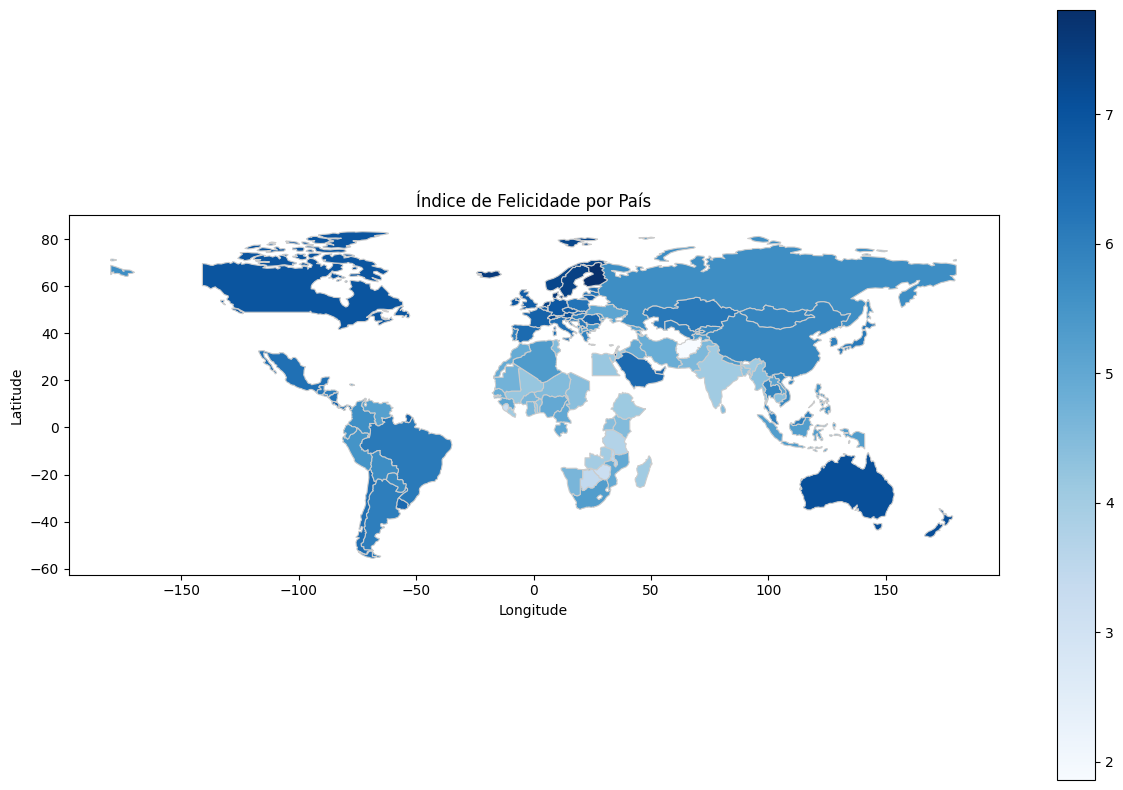

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='Ladder score', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Índice de Felicidade por País')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

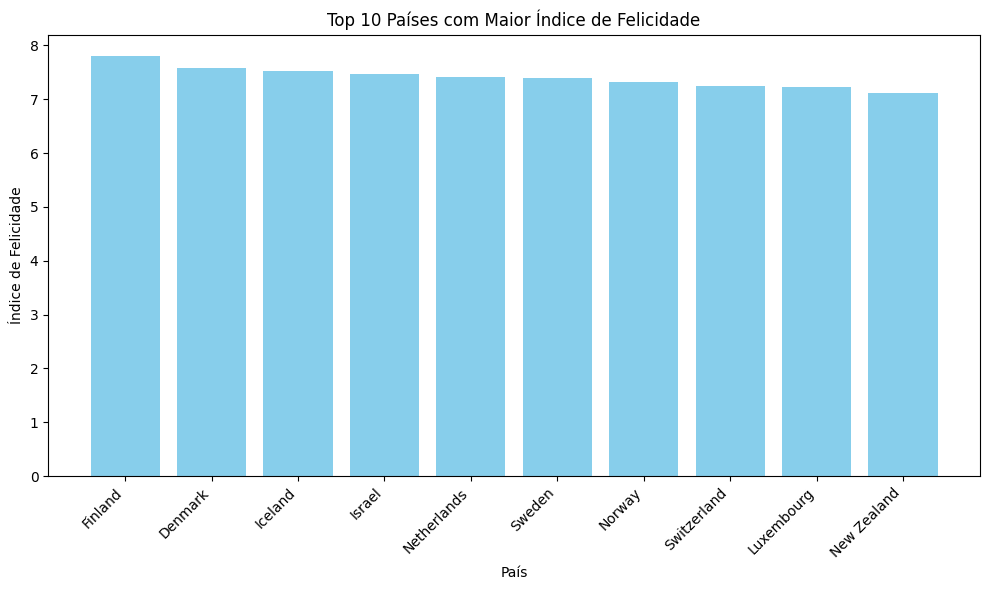

In [75]:
top_10 = data.sort_values(by='Ladder score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country name'], top_10['Ladder score'], color='skyblue')

plt.title('Top 10 Países com Maior Índice de Felicidade')
plt.xlabel('País')
plt.ylabel('Índice de Felicidade')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

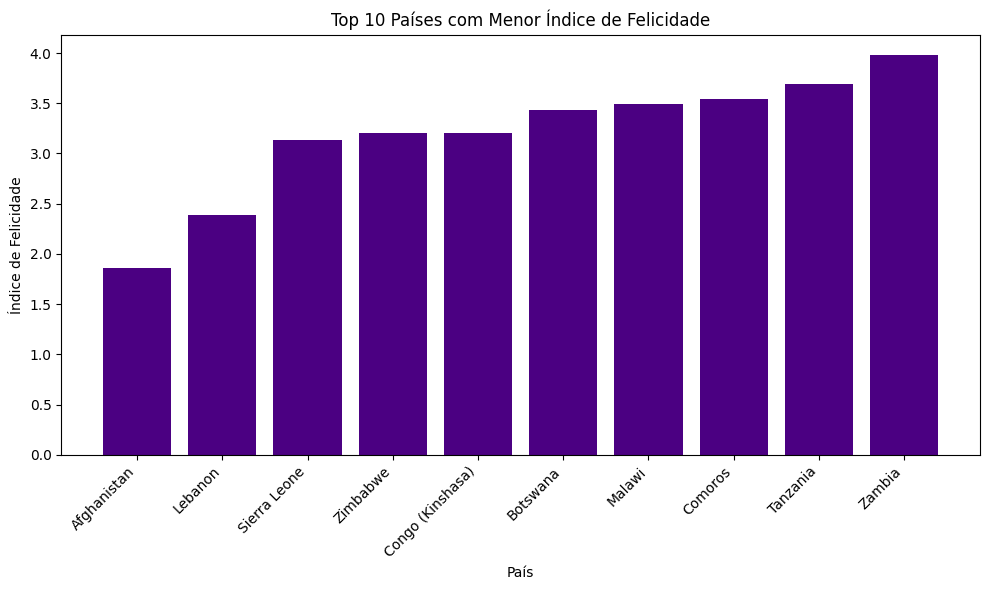

In [76]:
bottom_10 = data.sort_values(by='Ladder score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_10['Country name'], bottom_10['Ladder score'], color='indigo')

plt.title('Top 10 Países com Menor Índice de Felicidade')
plt.xlabel('País')
plt.ylabel('Índice de Felicidade')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

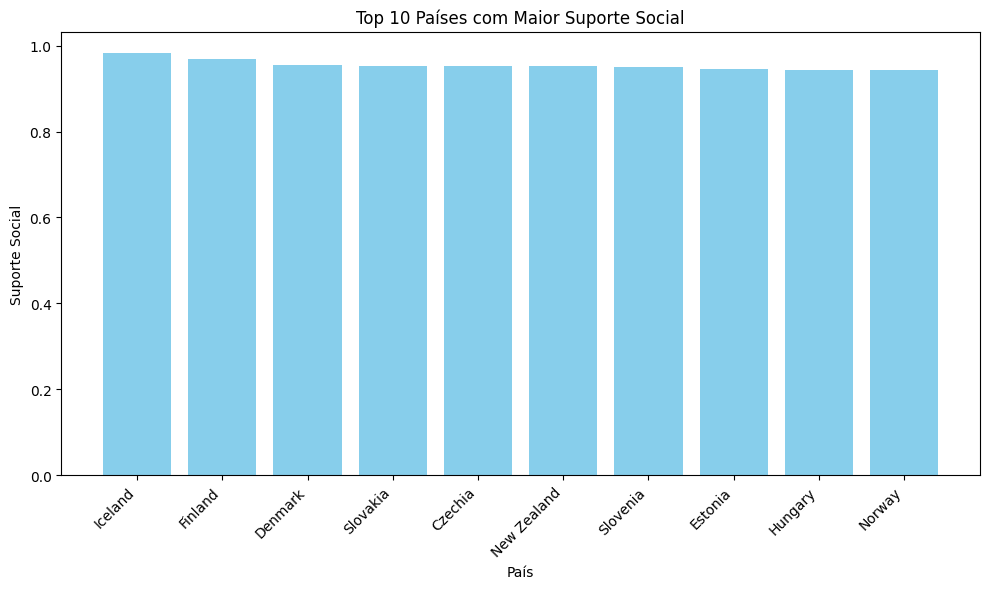

In [77]:
top_social_support = data.sort_values(by='Social support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_social_support['Country name'], top_social_support['Social support'], color='skyblue')

plt.title('Top 10 Países com Maior Suporte Social')
plt.xlabel('País')
plt.ylabel('Suporte Social')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

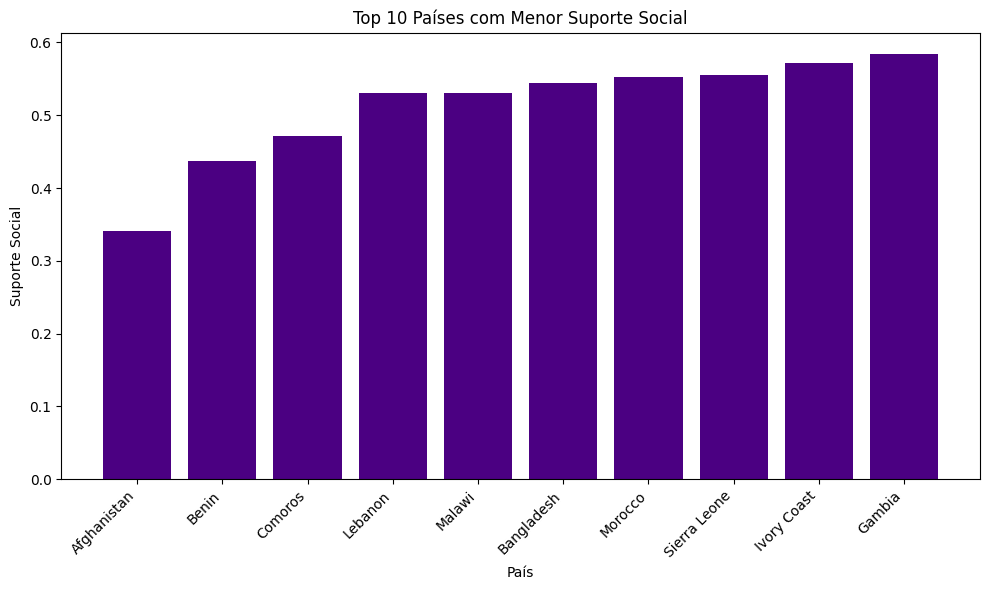

In [78]:
bottom_social_support = data.sort_values(by='Social support', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_social_support['Country name'], bottom_social_support['Social support'], color='indigo')

plt.title('Top 10 Países com Menor Suporte Social')
plt.xlabel('País')
plt.ylabel('Suporte Social')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

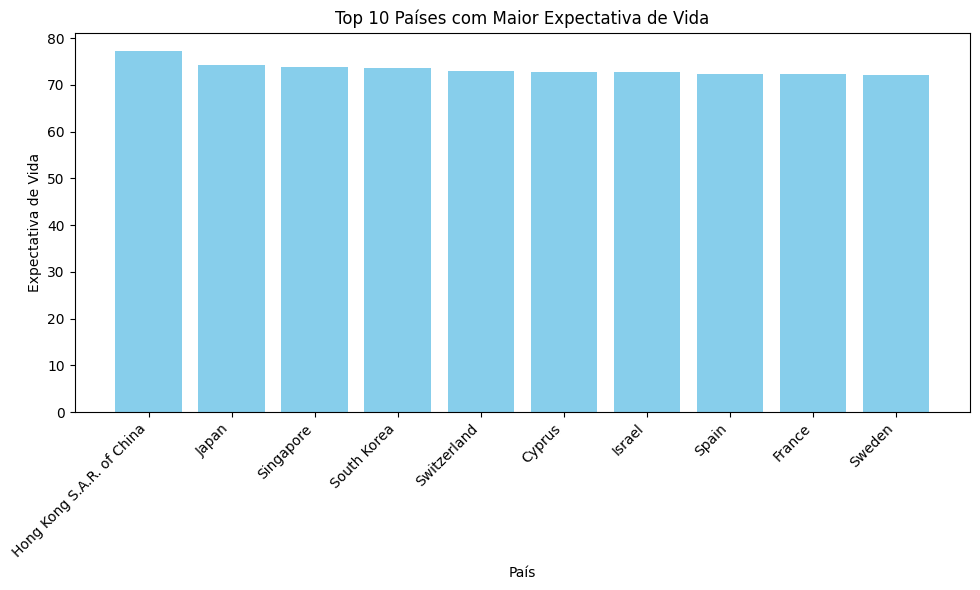

In [79]:
top_health_expectancy = data.sort_values(by='Healthy life expectancy', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_health_expectancy['Country name'], top_health_expectancy['Healthy life expectancy'], color='skyblue')

plt.title('Top 10 Países com Maior Expectativa de Vida')
plt.xlabel('País')
plt.ylabel('Expectativa de Vida')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

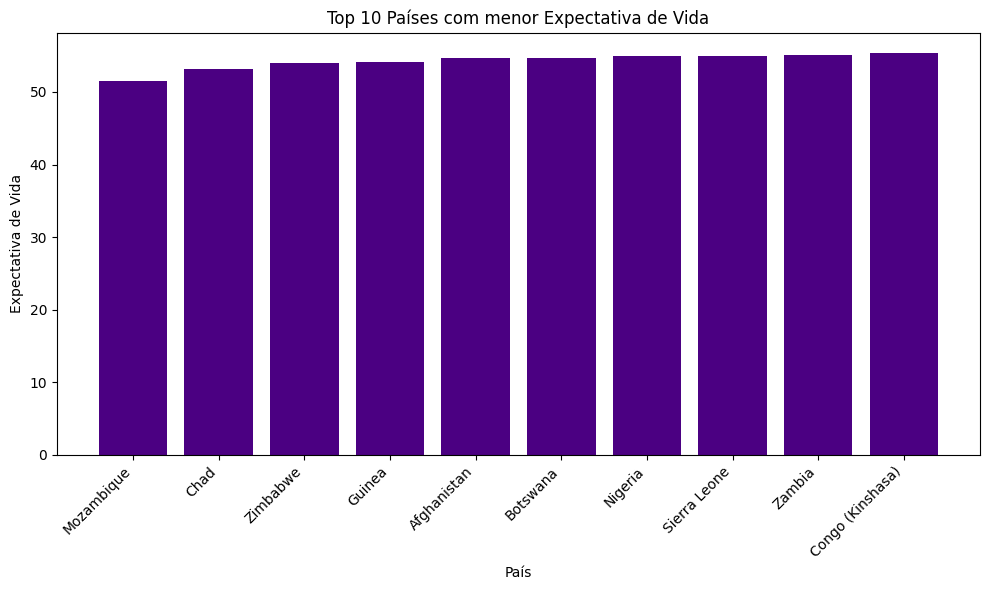

In [80]:
bottom_health_expectancy = data.sort_values(by='Healthy life expectancy', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_health_expectancy['Country name'], bottom_health_expectancy['Healthy life expectancy'], color='indigo')

plt.title('Top 10 Países com menor Expectativa de Vida')
plt.xlabel('País')
plt.ylabel('Expectativa de Vida')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()